In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read in csv data
regions = pd.read_csv('regions.csv')

In [3]:
# Read in csv data
df = pd.read_csv('train.csv', parse_dates=['date'], index_col='Id')

In [4]:
# get info about regions
regions.head()

,Code,Region
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands


In [59]:
# get info about data
df.tail()

,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
Id,,,,,,,,
18399,E12000006,2012-05-23,0.948,75.421,32.671,26.205,7.197,289.452
18400,E12000006,2012-05-24,0.948,76.441,36.838,33.014,9.165,290.277
18401,E12000006,2012-05-25,1.185,84.640,21.375,16.496,10.170,290.576
18402,E12000006,2012-05-26,0.914,93.455,20.009,15.675,8.701,290.413
18403,E12000006,2012-05-27,0.829,86.743,18.619,15.244,11.722,290.797


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18403 entries, 1 to 18403
Data columns (total 8 columns):
region            18403 non-null object
date              18403 non-null datetime64[ns]
mortality_rate    18403 non-null float64
O3                18394 non-null float64
PM10              18394 non-null float64
PM25              15127 non-null float64
NO2               11833 non-null float64
T2M               18403 non-null float64
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.3+ MB


In [55]:
df.describe()

,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.000000,18394.000000,18394.000000,15127.000000,11833.000000,18403.000000
mean,1.301737,45.325857,13.712272,7.498714,12.045813,283.002235
std,0.304161,16.221330,7.421616,5.758357,8.296675,5.182186
min,0.439000,0.988000,2.020000,0.904000,1.104000,265.562000
25%,1.102000,35.074250,8.656250,3.624000,6.056000,279.321500
50%,1.281000,45.836000,11.704500,5.636000,9.769000,283.270000
75%,1.474000,55.881000,16.589000,9.326500,15.858000,287.240500
max,2.841000,105.693000,60.627000,45.846000,76.765000,297.209000


In [56]:
# get column headers
df.columns

Index(['region', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2', 'T2M'], dtype='object')

In [57]:
# Clean data!

In [4]:
# Remove nan data and give it a new name
df_clean=df.dropna()
df_clean.describe()


,mortality_rate,O3,PM10,PM25,NO2,T2M
count,11833.000000,11833.000000,11833.000000,11833.000000,11833.000000,11833.000000
mean,1.260053,45.679521,13.817828,7.689485,12.045813,282.800695
std,0.290358,15.614786,7.290759,5.750032,8.296675,5.430124
min,0.439000,1.093000,2.375000,0.904000,1.104000,265.562000
25%,1.075000,35.915000,8.855000,3.903000,6.056000,278.964000
50%,1.242000,46.368000,11.891000,5.902000,9.769000,283.173000
75%,1.425000,56.069000,16.613000,9.452000,15.858000,287.197000
max,2.774000,96.284000,59.801000,45.846000,76.765000,297.209000


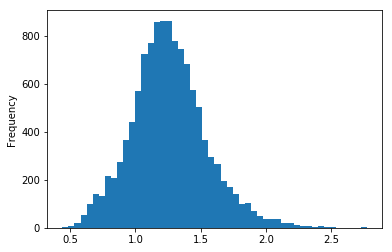

In [59]:
# A quick overview of the mortality rate, ie what we are trying to predict
df_clean['mortality_rate'].plot.hist(bins=50)

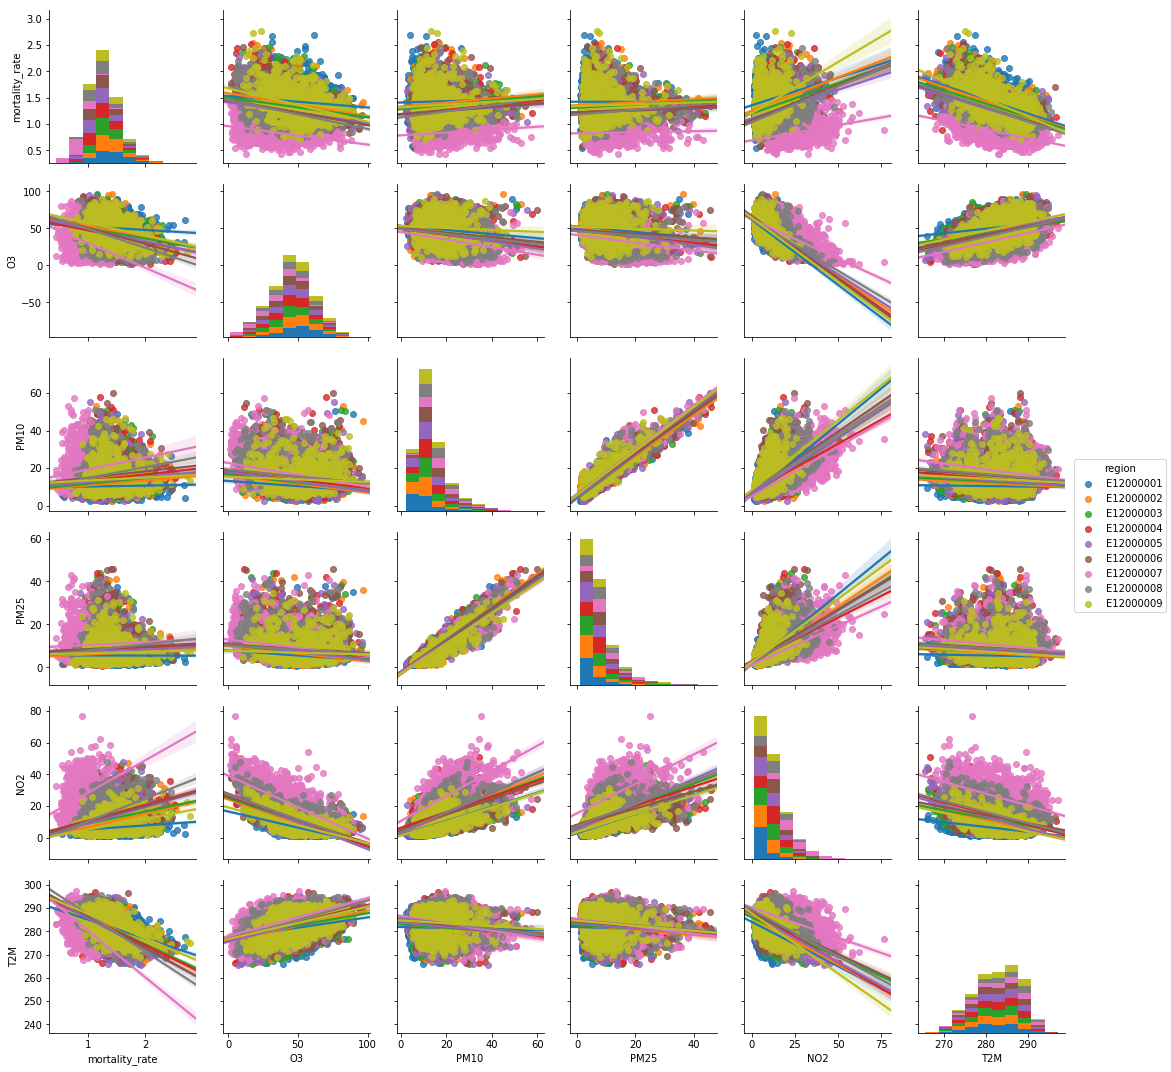

In [60]:
# To get an overall view of the relationships between the data. Y is mortality rate (the dependent variable) and X are O3, PM10, PM25,
# NO2 and T2M (independent variables)

# From the plot it can be seen that there is a general overall agreement between each region for each relationship, apart from E12*07
# Clear mulitcollinearity between PM10 and PM25 and possibly NO2. VIF for PM10 and PM25 is close to 7, whilst PM10 and NO2 are about 2


g=sns.pairplot(df_clean, vars=['mortality_rate', 'O3', 'PM10', 'PM25', 'NO2','T2M'], hue='region' ,kind='reg')

In [245]:
#df_clean = df_clean.loc[df['region'] == 'E12000009']
#sns.pairplot(df_clean, vars=['mortality_rate', 'O3', 'PM10', 'PM25', 'NO2','T2M'] ,kind='reg')

In [103]:
#df_clean.loc[df_clean['region'] == 'E12000007','O3']=np.nan
#df_clean=df_clean.dropna()
#df_clean.describe()


D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


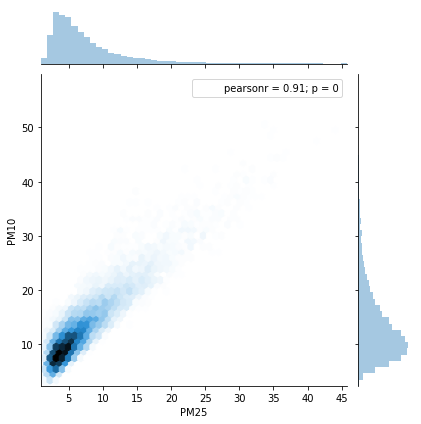

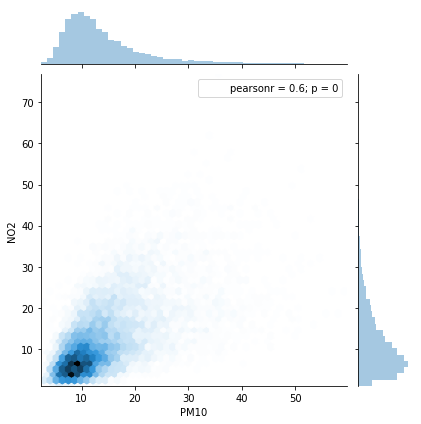

In [338]:
# Possible multi-collinearity between some of the independent variavles. This makes sense considering there are chemical relationships between them
# PM10 and PM25 show a strong correlation and hence co-linearity. Also

sns.jointplot(x='PM25',y='PM10', kind='hex',data=df_clean)
sns.jointplot(x='PM10',y='NO2', kind='hex', data=df_clean)


# Correlation >90%, hence strong multi-collinearity between two independent variables. 



D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


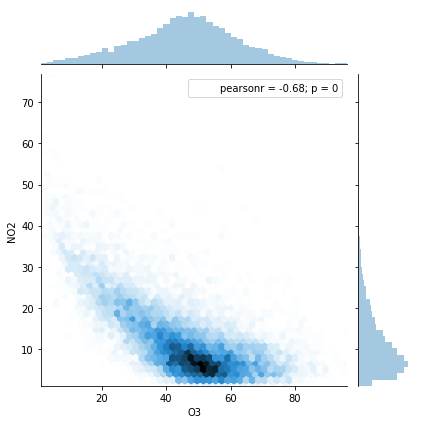

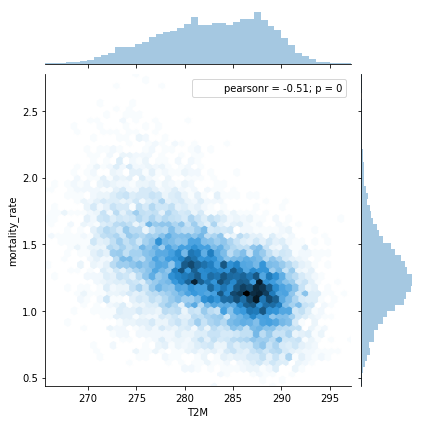

In [18]:
# Possible multi-collinearity between some of the independent variavles. This makes sense considering there are chemical relationships between them
# PM10 and PM25 show a strong correlation and hence co-linearity. Also


sns.jointplot(x='O3',y='NO2', kind='hex', data=df_clean)
sns.jointplot(x='T2M',y='mortality_rate', kind='hex', data=df_clean)

# Correlation >90%, hence strong multi-collinearity between two independent variables. 

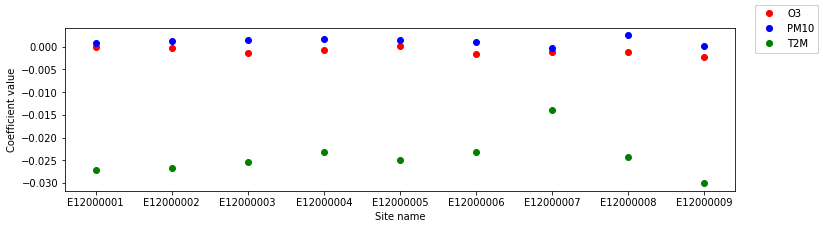

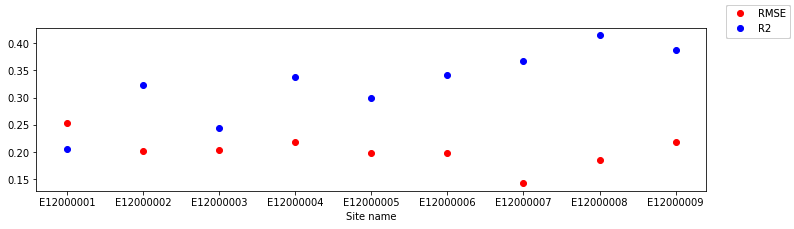

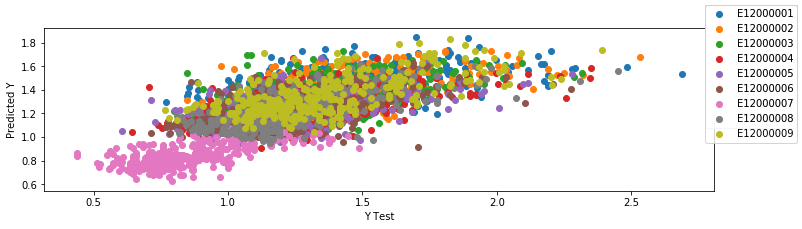

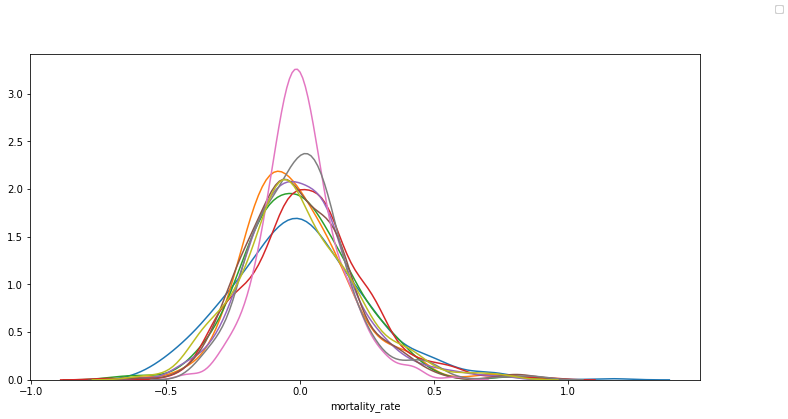

In [17]:
# Load in libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm

# set variables in model
o3=[]
pm10=[]
t2m=[]
pv=[]

mae=[]
mse=[]
rmse=[]

r2=[]

site = ['E12000001','E12000002','E12000003','E12000004','E12000005','E12000006','E12000007','E12000008','E12000009']

df_clean=df.dropna()

# Loop over each site, each time producing a multiple linear regression result. REsults are stored and also plotted for comparison
# for each site. 
for i in range(0,len(site)):
    
    # find data associated with the site "i"
    df_clean_site = df_clean.loc[df_clean['region'] == site[i]]
    
    # Define x and y data
    y = df_clean_site['mortality_rate']
    X = df_clean_site[['O3','PM10','T2M']]
    
    
    # Create training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Initialise the linear regression
    lm = LinearRegression()
    
    # Fit data
    lm.fit(X_train,y_train)
    
    ############################
    
    # Here I was info from the statsmodels library such as P values.
    
    # Create a dummy dataframe for testing
    y_df = pd.DataFrame(data=y_train, columns=['mortality_rate'])
    dummyset = pd.concat([y_df,X_train],axis=1)
    
    # Use ols to predict  r2 values
    model1 = sm.ols(formula='mortality_rate ~ O3 + PM10 + T2M', data=dummyset)
    fitted1 = model1.fit()
    pv.append(fitted1.pvalues)
    fitted1.summary()
    
    ############################
    
    # Append coefficient and intercept data to each variable for each site "i"  
    o3.append([lm.coef_[0],lm.intercept_])
    pm10.append([lm.coef_[1],lm.intercept_])
    t2m.append([lm.coef_[2],lm.intercept_])
    

    # Plot coefficients
    f=plt.figure(1,figsize=[12,3])
    plt.plot(site[i],lm.coef_[0],'ro')
    plt.plot(site[i],lm.coef_[1],'bo')
    plt.plot(site[i],lm.coef_[2],'go')
    
    plt.xlabel('Site name')
    plt.ylabel('Coefficient value')
    f.legend(['O3','PM10','T2M'])
    
    # Now make predictions based on fit and X_test
    predictions = lm.predict( X_test)
    
    # Output in terms of errors to see how good our model is
    mae.append(metrics.mean_absolute_error(y_test, predictions))
    mse.append(metrics.mean_squared_error(y_test, predictions))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    r2.append(metrics.r2_score(y_test, predictions))
       
    
    # Plot RMSE and R2
    f=plt.figure(2,figsize=[12,3])
    plt.plot(site[i],rmse[i],'ro',site[i],r2[i],'bo')
    plt.xlabel('Site name')
    f.legend(['RMSE','R2'])
    
    
    # Plot predicited vs Y_test
    f=plt.figure(3,figsize=[12,3])
    plt.scatter(y_test,predictions)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    f.legend(['E12000001','E12000002','E12000003','E12000004','E12000005','E12000006','E12000007','E12000008','E12000009'])
    
    # A KDE plot of the distribution of residuals at each site
    f=plt.figure(4,figsize=[12,6])
    sns.distplot((y_test-predictions),bins=50,rug=False, hist=False);
    f.legend(['E12000001','E12000002','E12000003','E12000004','E12000005','E12000006','E12000007','E12000008','E12000009'])

    

In [18]:
print(pv)

[Intercept    1.355276e-73
O3           9.330139e-01
PM10         5.621888e-01
T2M          4.961600e-54
dtype: float64, Intercept    8.676320e-114
O3            5.364835e-01
PM10          2.492491e-01
T2M           1.108745e-84
dtype: float64, Intercept    1.337130e-99
O3           7.116974e-03
PM10         1.628121e-01
T2M          1.851370e-73
dtype: float64, Intercept    4.704913e-81
O3           1.765642e-01
PM10         8.117636e-02
T2M          3.908583e-59
dtype: float64, Intercept    1.423964e-103
O3            8.309875e-01
PM10          1.073873e-01
T2M           1.442872e-77
dtype: float64, Intercept    9.370039e-86
O3           8.000255e-05
PM10         2.032596e-01
T2M          2.290374e-62
dtype: float64, Intercept    3.818249e-65
O3           9.895922e-04
PM10         6.505083e-01
T2M          5.583970e-46
dtype: float64, Intercept    5.843692e-96
O3           1.268667e-02
PM10         1.725249e-03
T2M          1.800311e-72
dtype: float64, Intercept    2.576871e-73
O3   

In [19]:
# Mean coefficient values

o3bar = sum(np.array(o3))/9
pm10bar = sum(np.array(pm10))/9
t2mbar = sum(np.array(t2m))/9
rmsebar = ((sum(np.array(rmse)**2))/9)**0.5
print(str(rmsebar))

df_average = pd.DataFrame({'O3':[o3bar[0],o3bar[1]],'PM10':[pm10bar[0],pm10bar[1]],'T2M':[t2mbar[0],t2mbar[1]]},index='M C'.split())

df_average.head()




0.2042287179993911


,O3,PM10,T2M
M,-0.000934,0.001111,-0.024348
C,8.162291,8.162291,8.162291


In [20]:
# So what do the coefficients mean on average?

# Holding all other features fixed, a 1 unit increase in O3 is associated with a dencrease of 0.001 in mortality rate.
# Holding all other features fixed, a 1 unit increase in PM10 is associated with an increase of 0.001 in mortality rate.
# Holding all other features fixed, a 1 unit increase in 2M Temperature is associated with an decrease of 0.024 in mortality rate. .

# Both O3 and PM10 show opposite effects, although a decrease in O3 means an increase in NO2. The impact of temperature is most renounced.

# P-values show Temperature to reject null hypotheses consistently, whilst O3 and PM10 show only a few occasions where a null hypothesis 
# can be rejected. Maybe that both O3 and PM10 are just adding noise are not significant contributors here.


# Perhaps temperature alone is the best variable to use?
# Also have not considered time, is there a seasonal effect?

Text(0,0.5,'Temp @ 2m (K) ')

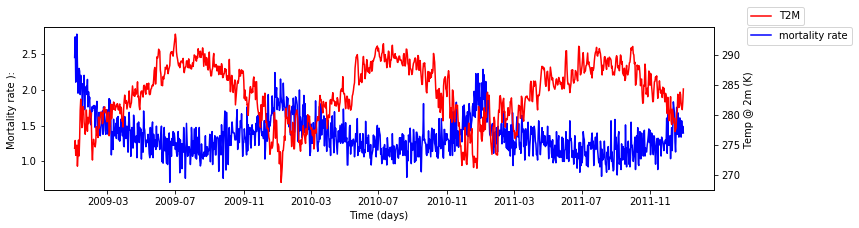

In [21]:

fig, ax1 = plt.subplots(figsize=(12,3))
ax1.set_xticks([2007,2008,2009,2010,2011,2012])

ax1.plot(df_clean_site['date'],df_clean_site['mortality_rate'],'b',label="mortality rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2 = ax1.twinx()
ax2.plot(df_clean_site['date'],df_clean_site['T2M'],'r',label="T2M")
plt.legend(bbox_to_anchor=(1.05, 1.12), loc=2, borderaxespad=0.)
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Mortality rate ): ')
ax2.set_ylabel('Temp @ 2m (K) ')




In [22]:
# Now consider using all data to produce a model, but only considering temperature as it is the varialbe which rejects the null hypothesis
# Using ideas from https://machinelearningmastery.com/time-series-seasonality-with-python/
# https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.apply.html
# Attempt to fit T2M, all stations, and seasonal cycle

# Create dummy variables for regions. 1: when region, 0: when not
df_clean1 = df_clean
regionuk = pd.get_dummies(df_clean['region'])
# Combine together
df_clean1 = pd.concat([df_clean,regionuk],axis=1)

# Now fit seasonal cycle using idea of fitting a curve using analogy of y = x^4*b1 + x^3*b2 + x^2*b3 + x^1*b4 + b5y
# "The seasonal component in a given time series is likely a sine wave over a generally fixed period and amplitude. 
# This can be approximated easily using a curve-fitting method."

df_clean1['dnum1'] = (df_clean1['date'].apply(lambda i: i.dayofyear if i else ''))**4
df_clean1['dnum2'] = (df_clean1['date'].apply(lambda i: i.dayofyear if i else ''))**3
df_clean1['dnum3'] = (df_clean1['date'].apply(lambda i: i.dayofyear if i else ''))**2
df_clean1['dnum4'] = (df_clean1['date'].apply(lambda i: i.dayofyear if i else ''))**1

df_clean1.head(366)


,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M,E12000001,E12000002,...,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,dnum1,dnum2,dnum3,dnum4
Id,,,,,,,,,,,,,,,,,,,,,
6571,E12000001,2009-01-01,2.213,22.833,9.614,4.078,7.882,273.262,1,0,...,0,0,0,0,0,0,1,1,1,1
6572,E12000001,2009-01-02,2.446,26.065,8.584,3.710,11.312,273.857,1,0,...,0,0,0,0,0,0,16,8,4,2
6573,E12000001,2009-01-03,2.174,35.166,14.295,2.911,6.419,272.466,1,0,...,0,0,0,0,0,0,81,27,9,3
6574,E12000001,2009-01-04,2.563,31.671,16.309,5.792,4.946,274.597,1,0,...,0,0,0,0,0,0,256,64,16,4
6575,E12000001,2009-01-05,2.679,31.801,11.041,4.527,8.263,273.160,1,0,...,0,0,0,0,0,0,625,125,25,5
6576,E12000001,2009-01-06,2.213,36.744,10.915,3.818,6.779,271.410,1,0,...,0,0,0,0,0,0,1296,216,36,6
6577,E12000001,2009-01-07,2.136,25.138,9.782,4.191,10.023,275.284,1,0,...,0,0,0,0,0,0,2401,343,49,7
6578,E12000001,2009-01-08,2.019,24.680,12.576,5.204,7.515,276.083,1,0,...,0,0,0,0,0,0,4096,512,64,8
6579,E12000001,2009-01-09,1.631,20.167,19.325,9.477,14.509,273.810,1,0,...,0,0,0,0,0,0,6561,729,81,9


In [23]:
# Define x and y data
y = df_clean1['mortality_rate']
X = df_clean1[['T2M','E12000001','E12000002','E12000003', 'E12000004','E12000005', 'E12000006','E12000007', 'E12000008','E12000009','dnum1','dnum2','dnum3','dnum4']]


# Create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialise the linear regression
lm = LinearRegression()

# Fit data
lm.fit(X_train,y_train)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
T2M,-3.492863e-03
E12000001,1.657762e-01
E12000002,1.241400e-01
E12000003,8.409658e-02
E12000004,-7.526594e-03
E12000005,-2.139614e-02
E12000006,-2.146676e-02
E12000007,-4.094760e-01
E12000008,-2.678270e-02
E12000009,1.126354e-01


In [24]:
############################

# Here I use info from the statsmodels library such as r2 values. Possibility also for P-values as well

# Create a dummy dataframe for testing
y_df = pd.DataFrame(data=y_train, columns=['mortality_rate'])
dummyset = pd.concat([y_df,X_train],axis=1)

# Use ols to predict  r2 values
model1 = sm.ols(formula='mortality_rate ~ T2M + E12000001 + E12000002 + E12000003 + E12000004 + E12000005 + E12000006 + E12000007 + E12000008 + E12000009 + dnum1 + dnum2 + dnum3 + dnum4', data=dummyset)
fitted1 = model1.fit()
r2.append(fitted1.rsquared)
pv.append(fitted1.pvalues)
fitted1.summary()

############################

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mortality_rate   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     982.5
Date:                Fri, 22 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:34:30   Log-Likelihood:                 2300.3
No. Observations:                8283   AIC:                            -4573.
Df Residuals:                    8269   BIC:                            -4474.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4343      0.190     12.840      0.000       2.063       2.806
T2M           -0.0035      0.001     -4.591      0.000      -0.005      -0.002
E12000001      0.4362      0.021     20.887      0.000       0.395       0.477
E12000002      0.3946      0.021     18.690      0.000       0.353       0.436
E12000003      0.3546      0.021     16.752      0.000       0.313       0.396
E12000004      0.2629      0.022     12.089      0.000       0.220       0.306
E12000005      0.2491      0.021     11.602      0.000       0.207       0.291
E12000006      0.2490      0.022     11.160      0.000       0.205       0.293
E12000007     -0.1390      0.023     -6.160      0.000      -0.183      -0.095
E12000008      0.2437      0.023     10.738      0.000       0.199       0.288
E12000009      0.3831      0.023     16.970      0.000       0.339       0.427
dnum1       4.461e-10   2.48e-11     17.996      0.000    3.98e-10    4.95e-10
dnum2      -3.104e-07   1.86e-08    -16.731      0.000   -3.47e-07   -2.74e-07
dnum3       8.207e-05   4.49e-06     18.271      0.000    7.33e-05    9.09e-05
dnum4         -0.0105      0.000    -27.208      0.000      -0.011      -0.010
==============================================================================
Omnibus:                      204.845   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.923
Skew:                           0.211   Prob(JB):                     5.16e-78
Kurtosis:                       3.924   Cond. No.                     7.53e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.18e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
 # Now make predictions based on fit and X_test
predictions = lm.predict( X_test)

In [26]:
# Output in terms of errors to see how good our model is
# https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

mae=metrics.mean_absolute_error(y_test, predictions)
mse=metrics.mean_squared_error(y_test, predictions)
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print('MAE:'+str(mae))
print('MSE:'+str(mse))
print('RMSE:'+str(rmse))
print('R^2:' + str(r2))

MAE:0.14170341405116285
MSE:0.033562324418420234
RMSE:0.18320023039947367
R^2:0.5882423182836123


Text(0.5,1,'Predictions vs mortality rates')

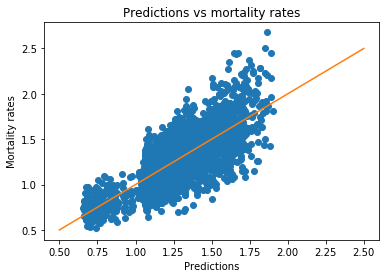

In [27]:
plt.plot(predictions,y_test,'o',[0.5,2.5],[0.5,2.5])
plt.xlabel('Predictions')
plt.ylabel('Mortality rates')
plt.title('Predictions vs mortality rates')

In [28]:
# Differences in statmodels and scikit-learn outputs can be realted different styles of approach. Scikit-learn better for ML, 
# but statmodels better for statisitics

# https://stats.stackexchange.com/questions/6/the-two-cultures-statistics-vs-machine-learning